In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import spatial
%matplotlib inline
sns.set_style("white")

In [2]:
def extend_users_df_with_relational_features(users_df):
    users_df['freebase_nmf_array'] = users_df[['freebase_nmf_0', 'freebase_nmf_1', 'freebase_nmf_2', 'freebase_nmf_3', 'freebase_nmf_4', 'freebase_nmf_5', 'freebase_nmf_6', 'freebase_nmf_7', 'freebase_nmf_8', 'freebase_nmf_9', 'freebase_nmf_10', 'freebase_nmf_11', 'freebase_nmf_12', 'freebase_nmf_13', 'freebase_nmf_14', 'freebase_nmf_15', 'freebase_nmf_16', 'freebase_nmf_17', 'freebase_nmf_18', 'freebase_nmf_19']].values.tolist()
    users_df['allmusic_genre_array'] = users_df[['allmusic_rnb', 'allmusic_rap', 'allmusic_electronic', 'allmusic_rock', 'allmusic_new age', 'allmusic_classical', 'allmusic_reggae', 'allmusic_blues', 'allmusic_country', 'allmusic_world', 'allmusic_folk', 'allmusic_easy listening', 'allmusic_jazz', 'allmusic_vocal', "allmusic_children's", 'allmusic_punk', 'allmusic_alternative', 'allmusic_spoken word', 'allmusic_pop', 'allmusic_heavy metal']].values.tolist()
    users_df['UAM_nmf_array'] = users_df[['UAM_nmf_0', 'UAM_nmf_1', 'UAM_nmf_2', 'UAM_nmf_3', 'UAM_nmf_4', 'UAM_nmf_5', 'UAM_nmf_6', 'UAM_nmf_7', 'UAM_nmf_8', 'UAM_nmf_9', 'UAM_nmf_10', 'UAM_nmf_11', 'UAM_nmf_12', 'UAM_nmf_13', 'UAM_nmf_14', 'UAM_nmf_15', 'UAM_nmf_16', 'UAM_nmf_17', 'UAM_nmf_18', 'UAM_nmf_19']].values.tolist()
    users_df['allmusic_genre_array'] = users_df['allmusic_genre_array'].apply(lambda x: np.array(x))
    users_df['freebase_nmf_array'] = users_df['freebase_nmf_array'].apply(lambda x: np.array(x))
    users_df['UAM_nmf_array'] = users_df['UAM_nmf_array'].apply(lambda x: np.array(x))
    return users_df

def calculate_cosine_similarity_for_vector_features(df, columns):
    for column in columns:
        df['cosine_similarity_'+column] = df.apply(lambda x: cosine_similarity(x['user1_'+column], x['user2_'+column]), axis=1)
    return df

def cosine_similarity(list1, list2):
    return 1 - spatial.distance.cosine(list1, list2)

In [3]:
links_df = pd.read_csv('../data/dataframes/links_dfs/0/links_df_full.csv', index_col=False)
links_df = links_df[links_df.label==1]
users_df = pd.read_csv('../data/dataframes/users_dfs/users_df_no_missing_values.csv', index_col=False)
users_df = extend_users_df_with_relational_features(users_df)

users1_df = pd.DataFrame([x for x in links_df['user1_user_id'].values]).rename(columns={0:'user_id'}).merge(users_df, how='left', on='user_id').add_prefix('user1_')
users2_df = pd.DataFrame([x for x in links_df['user2_user_id'].values]).rename(columns={0:'user_id'}).merge(users_df, how='left', on='user_id').add_prefix('user2_')
links_df = pd.concat([users1_df, users2_df.set_index(users1_df.index)], axis=1)
links_df['cosine_similarity_'+'UAM_nmf_array'] = links_df.apply(lambda x: cosine_similarity(x['user1_'+'UAM_nmf_array'], x['user2_'+'UAM_nmf_array']), axis=1)
links_df['cosine_similarity_'+'freebase_nmf_array'] = links_df.apply(lambda x: cosine_similarity(x['user1_'+'freebase_nmf_array'], x['user2_'+'freebase_nmf_array']), axis=1)
links_df['label'] = 1
links_df = calculate_cosine_similarity_for_vector_features(links_df, ['allmusic_genre_array', 'freebase_nmf_array', 'UAM_nmf_array'])

In [4]:
edges = list(zip(links_df.user1_user_id, links_df.user2_user_id))
G = nx.Graph()
for edge in edges:
    G.add_edge(edge[0], edge[1])

In [5]:
df_subset = links_df[['user1_playcount_lognorm', 
                'user1_novelty_artist_avg_month', 
                'user1_novelty_artist_avg_6months', 
                'user1_novelty_artist_avg_year',
                'user1_mainstreaminess_avg_month',
                'user1_mainstreaminess_avg_6months',
                'user1_mainstreaminess_avg_year',
                'user1_mainstreaminess_global',
                'user1_cnt_listeningevents_lognorm',
                'user1_cnt_distinct_tracks_lognorm',
                'user1_cnt_distinct_artists_lognorm',
                'user1_cnt_listeningevents_per_week_lognorm',
                'user1_allmusic_weighted_average_diversity',
                'user1_allmusic_genre_coverage_diversity',
                'user1_allmusic_entropy_diversity',
                'user1_freebase_weighted_average_diversity',
                'user1_freebase_genre_coverage_diversity',
                'user1_freebase_entropy_diversity',
                'user2_playcount_lognorm', 
                'user2_novelty_artist_avg_month', 
                'user2_novelty_artist_avg_6months', 
                'user2_novelty_artist_avg_year',
                'user2_mainstreaminess_avg_month',
                'user2_mainstreaminess_avg_6months',
                'user2_mainstreaminess_avg_year',
                'user2_mainstreaminess_global',
                'user2_cnt_listeningevents_lognorm',
                'user2_cnt_distinct_tracks_lognorm',
                'user2_cnt_distinct_artists_lognorm',
                'user2_cnt_listeningevents_per_week_lognorm',
                'user2_allmusic_weighted_average_diversity',
                'user2_allmusic_genre_coverage_diversity',
                'user2_allmusic_entropy_diversity',
                'user2_freebase_weighted_average_diversity',
                'user2_freebase_genre_coverage_diversity',
                'user2_freebase_entropy_diversity',
                'cosine_similarity_allmusic_genre_array',
                'cosine_similarity_freebase_nmf_array',
                'cosine_similarity_UAM_nmf_array'
                     ]]
df_subset['user1_playcount_lognorm'].fillna(df_subset['user1_playcount_lognorm'].mean(), inplace=True)
df_subset['user1_allmusic_weighted_average_diversity'].fillna(df_subset['user1_allmusic_weighted_average_diversity'].mean(), inplace=True)
df_subset['user1_allmusic_genre_coverage_diversity'].fillna(df_subset['user1_allmusic_genre_coverage_diversity'].mean(), inplace=True)
df_subset['user1_allmusic_entropy_diversity'].fillna(df_subset['user1_allmusic_entropy_diversity'].mean(), inplace=True)
df_subset['user1_freebase_weighted_average_diversity'].fillna(df_subset['user1_freebase_weighted_average_diversity'].mean(), inplace=True)
df_subset['user1_freebase_genre_coverage_diversity'].fillna(df_subset['user1_freebase_genre_coverage_diversity'].mean(), inplace=True)
df_subset['user1_freebase_entropy_diversity'].fillna(df_subset['user1_freebase_entropy_diversity'].mean(), inplace=True)

df_subset['user2_playcount_lognorm'].fillna(df_subset['user2_playcount_lognorm'].mean(), inplace=True)
df_subset['user2_allmusic_weighted_average_diversity'].fillna(df_subset['user2_allmusic_weighted_average_diversity'].mean(), inplace=True)
df_subset['user2_allmusic_genre_coverage_diversity'].fillna(df_subset['user2_allmusic_genre_coverage_diversity'].mean(), inplace=True)
df_subset['user2_allmusic_entropy_diversity'].fillna(df_subset['user2_allmusic_entropy_diversity'].mean(), inplace=True)
df_subset['user2_freebase_weighted_average_diversity'].fillna(df_subset['user2_freebase_weighted_average_diversity'].mean(), inplace=True)
df_subset['user2_freebase_genre_coverage_diversity'].fillna(df_subset['user2_freebase_genre_coverage_diversity'].mean(), inplace=True)
df_subset['user2_freebase_entropy_diversity'].fillna(df_subset['user2_freebase_entropy_diversity'].mean(), inplace=True)

df_subset['cosine_similarity_allmusic_genre_array'].fillna(df_subset['cosine_similarity_allmusic_genre_array'].mean(), inplace=True)
df_subset['cosine_similarity_freebase_nmf_array'].fillna(df_subset['cosine_similarity_freebase_nmf_array'].mean(), inplace=True)
df_subset['cosine_similarity_UAM_nmf_array'].fillna(df_subset['cosine_similarity_UAM_nmf_array'].mean(), inplace=True)

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [6]:
assortativity_coefficients = {}
for column in df_subset.columns:
    if '2' in column or 'label' in column or 'cosine' in column:
        continue
    assortativity_coefficients[column] = round(pearsonr(df_subset[column], df_subset[column.replace('1', '2')])[0], 3)

print('Assortativity coefficients for numeric features: \n')

for i in sorted(assortativity_coefficients.items(), key=lambda x: x[1], reverse=True):
	print(i[0], i[1])

Assortativity coefficients for numeric features: 

user1_freebase_weighted_average_diversity 0.229
user1_allmusic_weighted_average_diversity 0.182
user1_allmusic_entropy_diversity 0.179
user1_freebase_genre_coverage_diversity 0.149
user1_freebase_entropy_diversity 0.14
user1_novelty_artist_avg_6months 0.112
user1_cnt_distinct_artists_lognorm 0.106
user1_mainstreaminess_global 0.105
user1_allmusic_genre_coverage_diversity 0.092
user1_cnt_listeningevents_per_week_lognorm 0.09
user1_cnt_distinct_tracks_lognorm 0.079
user1_novelty_artist_avg_month 0.063
user1_novelty_artist_avg_year 0.058
user1_mainstreaminess_avg_month 0.055
user1_playcount_lognorm 0.053
user1_mainstreaminess_avg_6months 0.05
user1_mainstreaminess_avg_year 0.043
user1_cnt_listeningevents_lognorm 0.027


In [7]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", title='', **kwargs):

    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)
    ax.set_title(title)

    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.tick_params(top=False, bottom=False,
                   labeltop=False, labelbottom=True)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if j > i:
                continue
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [8]:
namings_map = {
    'mainstreaminess_global':'mainstreaminess',
    'freebase_weighted_average_diversity':'diversity',
    'novelty_artist_avg_6months':'novelty'
}
nodes_per_group = {
    'mainstreaminess_global': users_df.groupby(['user_groups_mainstreaminess_global']).count().user_id.to_dict(),
    'freebase_weighted_average_diversity': users_df.groupby(['user_groups_freebase_weighted_average_diversity']).count().user_id.to_dict(),
    'novelty_artist_avg_6months': users_df.groupby(['user_groups_novelty_artist_avg_6months']).count().user_id.to_dict()
}
keys = ['mainstreaminess_global|high', 
        'mainstreaminess_global|medium', 
        'mainstreaminess_global|low',
        'freebase_weighted_average_diversity|high',
        'freebase_weighted_average_diversity|medium',
        'freebase_weighted_average_diversity|low',
        'novelty_artist_avg_6months|high',
        'novelty_artist_avg_6months|medium',
        'novelty_artist_avg_6months|low']
total_edges = len(links_df)
total_nodes = len(users_df)
results = {}
for key1 in keys:
    for key2 in keys:
        metric1 = key1.split('|')[0]
        user_group1 = key1.split('|')[1]
        metric2 = key2.split('|')[0]
        user_group2 = key2.split('|')[1]
        if key1 == key2:
            expected_edges = (nodes_per_group[metric1][user_group1]/total_nodes)*(nodes_per_group[metric2][user_group2]/total_nodes) * total_edges
            real_edges = len(links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))])
            cosine_similarity_allmusic_genre_array_values = links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_allmusic_genre_array.values
            cosine_similarity_freebase_nmf_array_values = links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_freebase_nmf_array.values
            cosine_similarity_UAM_nmf_array_values = links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_UAM_nmf_array.values
        else:
            expected_edges = 2*(nodes_per_group[metric1][user_group1]/total_nodes)*(nodes_per_group[metric2][user_group2]/total_nodes) * total_edges
            real_edges = len(links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))]) + len(links_df[(links_df['user1_user_groups_'+metric2+'_'+user_group2]==True)&((links_df['user2_user_groups_'+metric1+'_'+user_group1]==True))])
            cosine_similarity_allmusic_genre_array_values = np.concatenate([links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_allmusic_genre_array.values, links_df[(links_df['user1_user_groups_'+metric2+'_'+user_group2]==True)&((links_df['user2_user_groups_'+metric1+'_'+user_group1]==True))].cosine_similarity_allmusic_genre_array.values])
            cosine_similarity_freebase_nmf_array_values = np.concatenate([links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_freebase_nmf_array.values, links_df[(links_df['user1_user_groups_'+metric2+'_'+user_group2]==True)&((links_df['user2_user_groups_'+metric1+'_'+user_group1]==True))].cosine_similarity_freebase_nmf_array.values])
            cosine_similarity_UAM_nmf_array_values = np.concatenate([links_df[(links_df['user1_user_groups_'+metric1+'_'+user_group1]==True)&((links_df['user2_user_groups_'+metric2+'_'+user_group2]==True))].cosine_similarity_UAM_nmf_array.values, links_df[(links_df['user1_user_groups_'+metric2+'_'+user_group2]==True)&((links_df['user2_user_groups_'+metric1+'_'+user_group1]==True))].cosine_similarity_UAM_nmf_array.values])
        results_key1 = user_group1.capitalize() + ' ' + namings_map[metric1]
        results_key2 = user_group2.capitalize() + ' ' + namings_map[metric2]
        results[(results_key1,results_key2)] = {
            'expected_edges':expected_edges, 
            'real_edges':real_edges, 
            'real_expected_ratio': real_edges/expected_edges,
            'cosine_similarity_allmusic_mean':np.nanmean(cosine_similarity_allmusic_genre_array_values),
            'cosine_similarity_freebase_nmf_mean':np.nanmean(cosine_similarity_freebase_nmf_array_values),
            'cosine_similarity_UAM_nmf_mean':np.nanmean(cosine_similarity_UAM_nmf_array_values),
            'cosine_similarity_allmusic_diff_to_mean':np.nanmean(cosine_similarity_allmusic_genre_array_values)/np.nanmean(links_df.cosine_similarity_allmusic_genre_array),
            'cosine_similarity_freebase_diff_to_mean':np.nanmean(cosine_similarity_freebase_nmf_array_values)/np.nanmean(links_df.cosine_similarity_freebase_nmf_array),
            'cosine_similarity_UAM_nmf_diff_to_mean':np.nanmean(cosine_similarity_UAM_nmf_array_values)/np.nanmean(links_df.cosine_similarity_UAM_nmf_array),
            'cosine_similarity_allmusic_diff_to_median':np.nanmean(cosine_similarity_allmusic_genre_array_values)/np.nanmedian(links_df.cosine_similarity_allmusic_genre_array),
            'cosine_similarity_freebase_diff_to_median':np.nanmean(cosine_similarity_freebase_nmf_array_values)/np.nanmedian(links_df.cosine_similarity_freebase_nmf_array),
            'cosine_similarity_UAM_nmf_diff_to_median':np.nanmean(cosine_similarity_UAM_nmf_array_values)/np.nanmedian(links_df.cosine_similarity_UAM_nmf_array)
        }

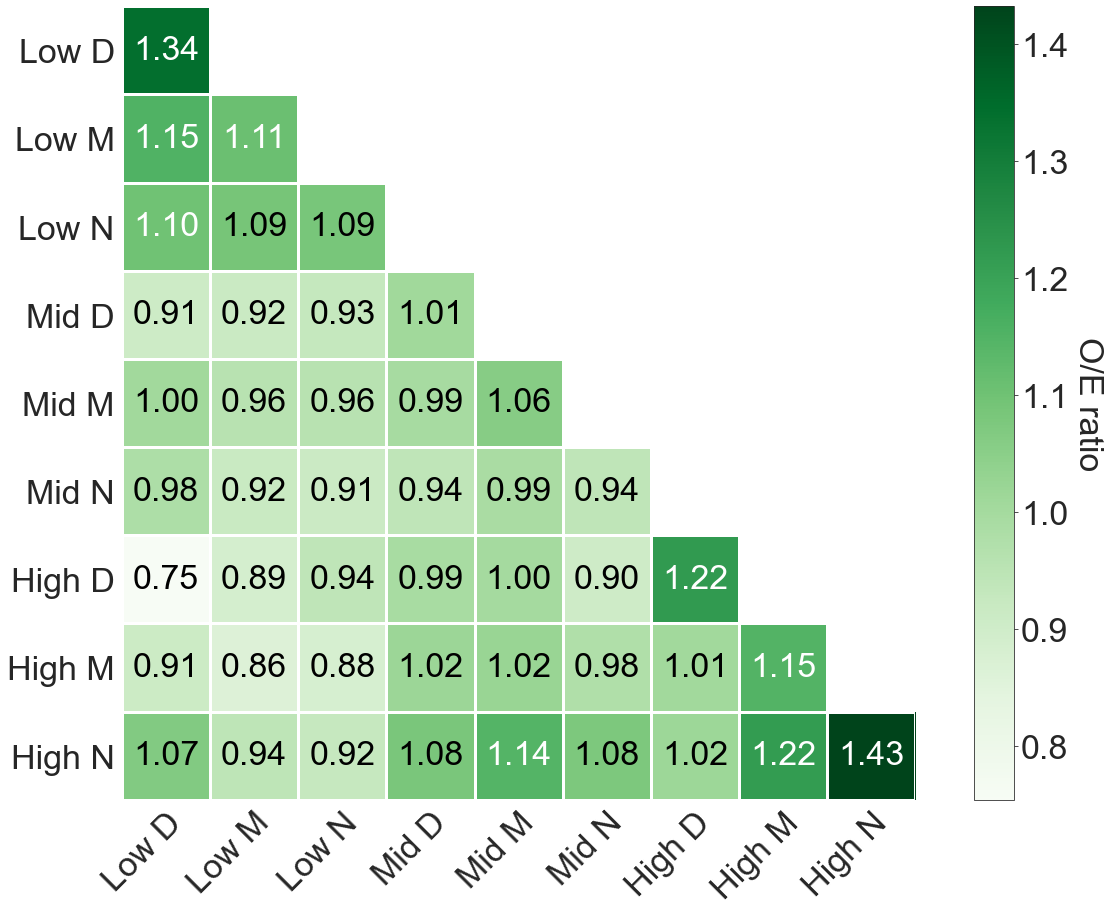

In [12]:
plt.rcParams.update({'figure.figsize' : (18,13.5), 'font.size': 34})
indices = ['Low diversity', 'Low mainstreaminess', 'Low novelty', 'Medium diversity', 'Medium mainstreaminess', 'Medium novelty', 'High diversity', 'High mainstreaminess', 'High novelty']
indices_short = ['Low D', 'Low M', 'Low N', 'Mid D', 'Mid M', 'Mid N', 'High D', 'High M', 'High N']

metric = 'real_expected_ratio'
values = np.zeros((len(indices), len(indices)))
for i in range(len(indices)):
    for j in range(len(indices)):
        if j > i:
            values[i,j] = np.nan
        else:
            values[i,j] = results[(indices[i], indices[j])][metric]

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

im, cbar = heatmap(values, indices_short, indices_short, ax=ax,
                   cmap="Greens", cbarlabel="O/E ratio",
                  title='')
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.savefig('../figures/homophily_all_user_groups.pdf',dpi=300, bbox_inches = "tight")

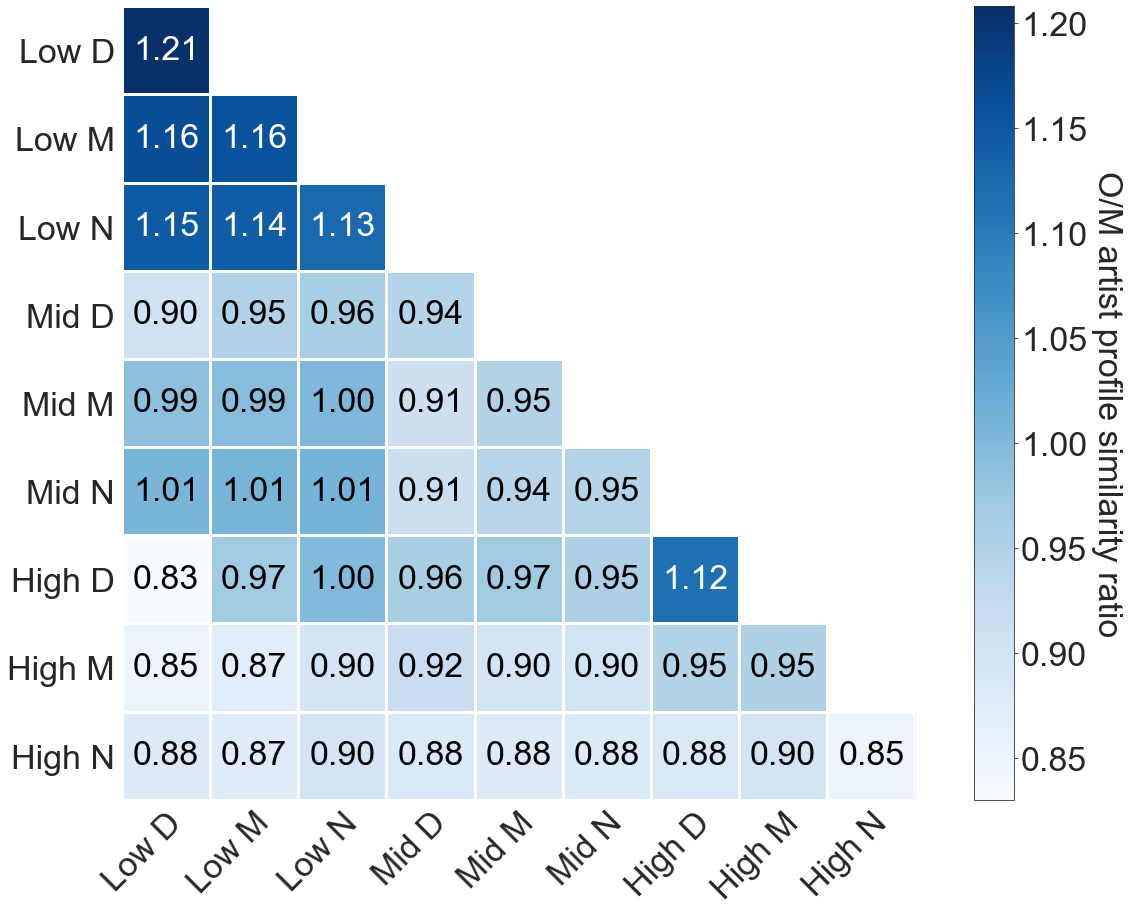

In [13]:
plt.rcParams.update({'figure.figsize' : (18,13.5), 'font.size': 34})
metric = 'cosine_similarity_UAM_nmf_diff_to_mean'
values = np.zeros((len(indices), len(indices)))
for i in range(len(indices)):
    for j in range(len(indices)):
        if j > i:
            values[i,j] = np.nan
        else:
            values[i,j] = results[(indices[i], indices[j])][metric]

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

im, cbar = heatmap(values, indices_short, indices_short, ax=ax,
                   cmap="Blues", cbarlabel="O/M artist profile similarity ratio")
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.savefig('../figures/UAM_nmf_diff_to_mean_cosine_all_user_groups_ratio.pdf',dpi=300, bbox_inches = "tight")

In [14]:
degrees = [d for v, d in G.degree()]
G_conf=nx.configuration_model(degrees)
G_conf=nx.Graph(G_conf)
G_conf.remove_edges_from(nx.selfloop_edges(G_conf))

node_ids = list(G.nodes)
source_nodes_conf = []
target_nodes_conf = []
for edge in G_conf.edges:
    source_nodes_conf.append(node_ids[edge[0]])
    target_nodes_conf.append(node_ids[edge[1]])

In [15]:
user1_df = pd.DataFrame(source_nodes_conf).rename(columns={0:'user_id'}).merge(users_df[['user_id', 'UAM_nmf_array', 'freebase_nmf_array']], on='user_id', how='left').rename(columns={'user_id':'user1_user_id', 'UAM_nmf_array':'user1_UAM_nmf_array', 'freebase_nmf_array':'user1_freebase_array'})
user2_df = pd.DataFrame(target_nodes_conf).rename(columns={0:'user_id'}).merge(users_df[['user_id', 'UAM_nmf_array', 'freebase_nmf_array']], on='user_id', how='left').rename(columns={'user_id':'user2_user_id', 'UAM_nmf_array':'user2_UAM_nmf_array', 'freebase_nmf_array':'user2_freebase_array'})

In [16]:
profile_similarity_conf_df = pd.concat([user1_df, user2_df], axis=1)
profile_similarity_conf_df['cosine_similarity_'+'UAM_nmf_array'] = profile_similarity_conf_df.apply(lambda x: cosine_similarity(x['user1_'+'UAM_nmf_array'], x['user2_'+'UAM_nmf_array']), axis=1)
profile_similarity_conf_df['cosine_similarity_'+'freebase_array'] = profile_similarity_conf_df.apply(lambda x: cosine_similarity(x['user1_'+'freebase_array'], x['user2_'+'freebase_array']), axis=1)

In [17]:
profile_similarity_conf_df

,user1_user_id,user1_UAM_nmf_array,user1_freebase_array,user2_user_id,user2_UAM_nmf_array,user2_freebase_array,cosine_similarity_UAM_nmf_array,cosine_similarity_freebase_array
0,7758024,"[0.0, 0.0012784867502037, 0.0031295252064803, ...","[0.0, 0.0, 0.0004771726911167, 0.0007711663851...",24281039,"[0.0, 0.0, 0.000141953039955, 0.0, 0.008211122...","[0.0, 0.0, 0.0003298947224861, 4.2728521746086...",0.502337,0.895562
1,34641085,"[0.0, 0.0082100220830809, 0.0, 0.0, 0.00354088...","[0.0, 1.122334562065812e-05, 2.330710147624783...",3469133,"[0.002050033390722, 0.0, 0.0020112045456995, 0...","[0.0, 0.00037728672521, 0.0, 0.0, 0.0028447507...",0.091672,0.327681
2,9484073,"[0.0, 0.0, 0.0, 0.0001236817886783, 0.0, 0.0, ...","[0.0, 0.0041989347404818, 0.0, 0.0, 0.00286181...",5312764,"[0.0, 0.000640626957082, 0.0001290833782919, 7...","[0.0, 0.0044798010334829, 0.0, 0.0006082727995...",0.982904,0.941119
3,9484073,"[0.0, 0.0, 0.0, 0.0001236817886783, 0.0, 0.0, ...","[0.0, 0.0041989347404818, 0.0, 0.0, 0.00286181...",30431506,"[0.0, 0.0, 0.0001202490600548, 0.0001247872218...","[0.0, 0.0004989527993736, 0.0, 0.0, 0.00289184...",0.002797,0.663991
4,9484073,"[0.0, 0.0, 0.0, 0.0001236817886783, 0.0, 0.0, ...","[0.0, 0.0041989347404818, 0.0, 0.0, 0.00286181...",30228954,"[0.0001914662831052, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0011412351346094, 0.0, 2.6808871893787...",0.988942,0.813949
...,...,...,...,...,...,...,...,...
78153,35999519,"[0.0, 0.0024414655826005, 0.0001049021599248, ...","[0.0, 0.0, 7.684823644708563e-05, 0.0001072285...",31494112,"[5.4464116066026594e-05, 0.0, 1.04218711924960...","[0.0, 0.0, 0.0, 0.0, 0.0028801172391698, 0.0, ...",0.276527,0.693888
78154,33350012,"[0.0, 0.0093729213220014, 0.0, 0.0030699947250...","[9.772791382299645e-06, 0.0001644097976248, 0....",30447792,"[0.0004691154357306, 0.0, 0.0, 0.0, 0.0, 0.002...","[8.00899577107793e-05, 0.0, 1.3555544473338263...",0.156119,0.891997
78155,5321942,"[0.0027684176376606, 0.0003959709015699, 0.000...","[0.0, 3.45533499372135e-05, 3.7897719868234046...",5212228,"[8.397886445278303e-05, 0.0, 0.0, 0.0002640269...","[0.0, 0.0015000828097175, 0.0, 0.0, 0.00287799...",0.010306,0.662317
78156,31559426,"[0.0006124679996739, 0.0, 0.0169706626858342, ...","[2.194313293487204e-05, 1.4397446036247148e-05...",42935765,"[0.0, 0.0, 0.0050660357372597, 0.0, 0.00276760...","[0.0, 0.0, 6.657012476486069e-06, 0.0, 0.00289...",0.288339,0.996324


In [18]:
print(df_subset['cosine_similarity_UAM_nmf_array'].mean())
print(df_subset['cosine_similarity_UAM_nmf_array'].std())
print(profile_similarity_conf_df['cosine_similarity_UAM_nmf_array'].mean())
print(profile_similarity_conf_df['cosine_similarity_UAM_nmf_array'].std())

0.41734363441724287
0.30274160594569494
0.2390375188904849
0.25460759883092876


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


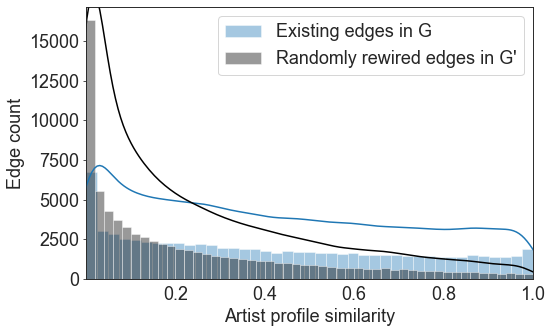

In [19]:
plt.rcParams.update({'figure.figsize' : (8,5), 'font.size': 18})
f,ax1 = plt.subplots()
sns.distplot(df_subset['cosine_similarity_UAM_nmf_array'].values,kde=False,ax=ax1, label='Existing edges in G')
sns.distplot(profile_similarity_conf_df['cosine_similarity_UAM_nmf_array'].values,kde=False,ax=ax1, label='Randomly rewired edges in G\'', color='black')
plt.legend();
ax2 = ax1.twinx()
ax2.set_ylim(0,4)
ax2.yaxis.set_ticks([])
sns.kdeplot(df_subset['cosine_similarity_UAM_nmf_array'].values,ax=ax2)
sns.kdeplot(profile_similarity_conf_df['cosine_similarity_UAM_nmf_array'].values,ax=ax2, color='black')
ax1.set_xlabel('Artist profile similarity')
ax1.set_ylabel('Edge count')
ax2.set_xticks([0.2,0.4,0.6,0.8,1])
plt.xlim(0, 1.0)
plt.savefig('../figures/existing_vs_random_listening_profile_similarity.pdf',dpi=300, bbox_inches = "tight")